In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\geral\anaconda3\envs\advpython\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [2]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [62]:
df = pd.read_csv("austinHousingData.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,zpid,city,streetAddress,zipcode,description,latitude,longitude,garageSpaces,hasAssociation,hasCooling,...,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,2,True,True,...,9,2019,6011.0,2601,1.266667,2.666667,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,2,True,True,...,10,2020,6185.0,1768,1.400000,2.666667,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,0,True,True,...,7,2019,7840.0,1478,1.200000,3.000000,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,2,True,True,...,8,2018,6098.0,1678,1.400000,2.666667,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,0,True,True,...,10,2018,6708.0,2132,1.133333,4.000000,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,6,False,True,...,12,2020,6534.0,1234,0.900000,3.333333,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15166,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,2,True,True,...,12,2020,2439.0,1888,1.900000,6.666667,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15167,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,2,False,True,...,1,2021,9408.0,1524,0.800000,5.000000,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15168,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,0,False,True,...,8,2019,6098.0,6068,1.300000,6.666667,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


# Select your features (columns)

In [63]:
df.info()
# df.describe
# df.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15170 entries, 0 to 15169
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zpid               15170 non-null  int64  
 1   city               15170 non-null  object 
 2   streetAddress      15170 non-null  object 
 3   zipcode            15170 non-null  int64  
 4   description        15170 non-null  object 
 5   latitude           15170 non-null  float64
 6   longitude          15170 non-null  float64
 7   garageSpaces       15170 non-null  int64  
 8   hasAssociation     15170 non-null  bool   
 9   hasCooling         15170 non-null  bool   
 10  hasView            15170 non-null  bool   
 11  homeType           15170 non-null  object 
 12  yearBuilt          15170 non-null  int64  
 13  latestPrice        15170 non-null  int64  
 14  latest_salemonth   15170 non-null  int64  
 15  latest_saleyear    15170 non-null  int64  
 16  lotSizeSqFt        151

In [64]:
# Set features. This will also be used as your x values.
selected_features = df[['latestPrice', 'latest_saleyear', 'yearBuilt','garageSpaces', 'lotSizeSqFt',
                        'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
                        'avgSchoolRating','avgSchoolDistance', 'latestPrice', 'latest_salemonth']]

selected_features.head()

,latestPrice,latest_saleyear,yearBuilt,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,avgSchoolRating,avgSchoolDistance,latestPrice,latest_salemonth
0,305000,2019,2012,2,6011.0,2601,3.0,4,2,2.666667,1.266667,305000,9
1,295000,2020,2013,2,6185.0,1768,2.0,4,1,2.666667,1.400000,295000,10
2,256125,2019,2018,0,7840.0,1478,2.0,3,1,3.000000,1.200000,256125,7
3,240000,2018,2013,2,6098.0,1678,2.0,3,1,2.666667,1.400000,240000,8
4,239900,2018,2002,0,6708.0,2132,3.0,3,2,4.000000,1.133333,239900,10


In [28]:
# X = df[['latestPrice', 'numOfBathrooms', 'livingAreaSqFt']]

# X.head()

,latestPrice,numOfBathrooms,livingAreaSqFt
0,305000,3.0,2601
1,295000,2.0,1768
2,256125,2.0,1478
3,240000,2.0,1678
4,239900,3.0,2132


# Create a Train Test Split

In [65]:
# train, test, split
X = selected_features
y = df['city']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
X_train.head()

,latestPrice,latest_saleyear,yearBuilt,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,avgSchoolRating,avgSchoolDistance,latestPrice,latest_salemonth
1145,142136,2018,2005,0,6969.0,1650,2.0,4,1,2.666667,2.366667,142136,3
8937,337000,2018,1998,2,6011.0,1678,2.0,3,1,6.666667,3.266667,337000,2
15077,310000,2019,1949,0,6446.0,952,1.0,2,1,7.000000,0.700000,310000,11
13509,409000,2019,1987,0,8145.0,2694,3.0,5,2,4.666667,1.533333,409000,11
733,775000,2020,1993,2,10410.0,3114,3.0,5,2,9.333333,1.866667,775000,8


In [67]:
# split the data to train and test values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
X_train.head()

,latestPrice,latest_saleyear,yearBuilt,garageSpaces,lotSizeSqFt,livingAreaSqFt,numOfBathrooms,numOfBedrooms,numOfStories,avgSchoolRating,avgSchoolDistance,latestPrice,latest_salemonth
1145,142136,2018,2005,0,6969.0,1650,2.0,4,1,2.666667,2.366667,142136,3
8937,337000,2018,1998,2,6011.0,1678,2.0,3,1,6.666667,3.266667,337000,2
15077,310000,2019,1949,0,6446.0,952,1.0,2,1,7.000000,0.700000,310000,11
13509,409000,2019,1987,0,8145.0,2694,3.0,5,2,4.666667,1.533333,409000,11
733,775000,2020,1993,2,10410.0,3114,3.0,5,2,9.333333,1.866667,775000,8


# Data Preprocessing

In [69]:
# df['homeType'] = df['homeType'].str.replace(',', '')
# df['homeType'] = df['homeType'].convert_objects(convert_numeric=True)
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# Scale your data. Import dependencies.
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from tensorflow.keras.utils import to_categorical

# Scale the data.
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encoder dataset.
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[0 0 0 ... 0 0 0]


# Train the Model

In [70]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [71]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.9906829568427529
Testing Data Score: 0.9920906933825469


In [75]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions,
                           target_names =["austin", "del valle", "driftwood", "dripping springs",
                                          "manchaca", "manor", "pflugerville", "west lake hills"]))

                  precision    recall  f1-score   support

          austin       0.99      1.00      1.00      3763
       del valle       0.60      0.17      0.26        18
       driftwood       0.00      0.00      0.00         2
dripping springs       0.00      0.00      0.00         1
        manchaca       0.00      0.00      0.00         1
           manor       0.00      0.00      0.00         2
    pflugerville       0.00      0.00      0.00         6
 west lake hills       0.00      0.00      0.00         0

        accuracy                           0.99      3793
       macro avg       0.20      0.15      0.16      3793
    weighted avg       0.99      0.99      0.99      3793



# Hyperparameter Tuning

In [76]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [77]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\geral\anaconda3\envs\advPython\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.990, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.989, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.991, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.991, total=   0.3s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.991, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.990, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.989, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.991, total=   0.3s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.991, total=   0.2s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[CV] .................. C=50, gamma=0.0001, score=0.991, total=   0.6s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.992, total=   1.2s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.992, total=   0.7s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.992, total=   0.9s
[CV] C=50, gamma=0.0001 ..............................................
[CV] .................. C=50, gamma=0.0001, score=0.991, total=   0.7s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.991, total=   0.6s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .................. C=50, gamma=0.0005, score=0.992, total=   1.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   37.3s finished


GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [78]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.9919135170629019


# Excess Code

In [12]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)



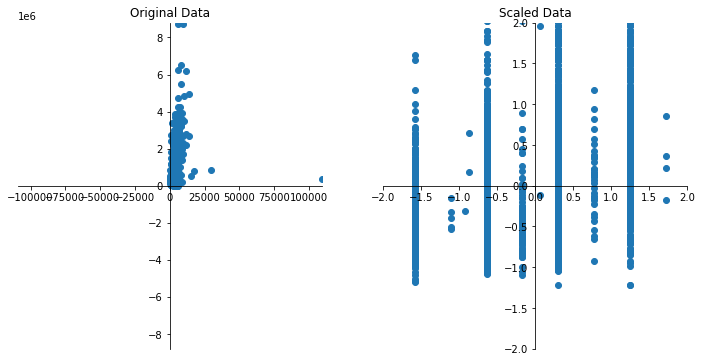

In [13]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["livingAreaSqFt"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 100, maxx + 100)
# axes1.set_ylim(-maxy + 100, maxy + 100)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["livingAreaSqFt"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)